## Usecase

Optimize markdown reduction values to avoid waste and improve revenue.

For more examples: https://www.google.com/search?q=optimize+markdown+reduction+values

### Additional resources

- https://github.com/datagridsoftware/practical-ml
- https://towardsdatascience.com/
- https://stackoverflow.com/

In [1]:
import pandas as pd
import numpy as np
from datetime import date

### Reading Data

- buil-in & plugins
- CSV, Excel, SQL etc

https://pandas.pydata.org/docs/user_guide/io.html

In [2]:
df = pd.read_csv("markdown.csv", na_values="?", comment="\t", sep=",", skipinitialspace=True)    
df.sample(10)

,sold,quantity,price,reduction,date,store,days
4933,1.0,3.0,96.0,50,2022-03-13,MAG_1,0
9121,2.0,2.0,102.0,50,2021-11-26,MAG_2,1
1877,3.0,3.0,20.0,50,2021-07-19,MAG_2,0
3212,2.0,4.0,112.0,30,2022-02-03,MAG_2,1
7628,3.0,4.0,79.0,50,2021-01-19,MAG_2,1
9492,5.0,6.0,91.0,50,2021-03-19,MAG_4,1
9685,30.0,30.0,14.0,40,2021-08-21,MAG_2,8
5085,5.0,5.0,127.0,50,2021-12-07,MAG_2,0
3644,6.0,6.0,99.0,50,2021-11-03,MAG_4,5
4900,6.0,6.0,178.0,50,2022-02-20,MAG_3,3


## Data Wrangling

https://pandas.pydata.org/docs/user_guide/indexing.html

In [3]:
# last elements in the dataframe
df.tail(5)

,sold,quantity,price,reduction,date,store,days
10630,5.0,6.0,79.0,30,2021-11-25,MAG_3,1
10631,2.0,4.0,136.0,50,2022-01-29,MAG_3,0
10632,5.0,5.0,51.0,50,2021-01-04,MAG_3,4
10633,4.0,6.0,115.0,50,2021-05-09,MAG_2,1
10634,6.0,6.0,146.0,40,2021-11-24,MAG_3,7


In [4]:
# the "price" column (series)
df["price"]

0         87.0
1         65.0
2         38.0
3        102.0
4        236.0
         ...  
10630     79.0
10631    136.0
10632     51.0
10633    115.0
10634    146.0
Name: price, Length: 10635, dtype: float64

In [5]:
# the data frame containing a single column, price
df[["price"]]

,price
0,87.0
1,65.0
2,38.0
3,102.0
4,236.0
...,...
10630,79.0
10631,136.0
10632,51.0
10633,115.0


In [6]:
# selecting data based on properties
df[ df["quantity"] >= 50 ]

,sold,quantity,price,reduction,date,store,days
21,30.0,50.0,11.0,50,2022-03-25,MAG_2,0
278,10.0,50.0,199.0,50,2021-09-28,MAG_1,1
1713,10.0,50.0,103.0,50,2021-09-21,MAG_4,1
2421,50.0,50.0,176.0,50,2022-02-28,MAG_3,6
3005,60.0,60.0,64.0,30,2022-03-08,MAG_2,3
3784,30.0,60.0,161.0,30,2021-10-19,MAG_3,1
4038,60.0,60.0,119.0,50,2022-03-02,MAG_2,8
4209,60.0,60.0,40.0,50,2021-05-14,MAG_2,1
5025,0.0,60.0,182.0,50,2022-02-19,MAG_1,0
6447,50.0,50.0,41.0,50,2021-02-28,MAG_3,8


In [7]:
# slice the data by row and column
df.iloc[-5:, :]

,sold,quantity,price,reduction,date,store,days
10630,5.0,6.0,79.0,30,2021-11-25,MAG_3,1
10631,2.0,4.0,136.0,50,2022-01-29,MAG_3,0
10632,5.0,5.0,51.0,50,2021-01-04,MAG_3,4
10633,4.0,6.0,115.0,50,2021-05-09,MAG_2,1
10634,6.0,6.0,146.0,40,2021-11-24,MAG_3,7


In [8]:
# take very second row from 2 to 10
df.iloc[2:10:2, :]

,sold,quantity,price,reduction,date,store,days
2,5.0,5.0,38.0,30,2022-01-05,MAG_4,9
4,4.0,4.0,236.0,30,2021-01-12,MAG_3,4
6,4.0,4.0,26.0,50,2021-08-03,MAG_3,6
8,2.0,4.0,93.0,30,2021-07-15,MAG_4,1


### Data Attributes

In [9]:
# basic information about the data types. The data we use does not have missing values but in general
# data has gaps that need to be addressed before using it
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sold       10635 non-null  float64
 1   quantity   10635 non-null  float64
 2   price      10635 non-null  float64
 3   reduction  10635 non-null  int64  
 4   date       10635 non-null  object 
 5   store      10635 non-null  object 
 6   days       10635 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 581.7+ KB


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sold,10635.0,3.509826,3.423411,-0.0,1.0,3.0,5.0,60.0
quantity,10635.0,4.993418,3.812977,1.0,3.0,5.0,6.0,60.0
price,10635.0,100.029807,56.180760,11.0,56.0,93.0,137.0,394.0
reduction,10635.0,44.541608,8.329767,30.0,40.0,50.0,50.0,50.0
days,10635.0,2.578467,2.734597,0.0,1.0,1.0,4.0,9.0


In [11]:
df.nunique()

sold          17
quantity      16
price        288
reduction      3
date         456
store          4
days          10
dtype: int64

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sold,10635.0,3.509826,3.423411,-0.0,1.0,3.0,5.0,60.0
quantity,10635.0,4.993418,3.812977,1.0,3.0,5.0,6.0,60.0
price,10635.0,100.029807,56.180760,11.0,56.0,93.0,137.0,394.0
reduction,10635.0,44.541608,8.329767,30.0,40.0,50.0,50.0,50.0
days,10635.0,2.578467,2.734597,0.0,1.0,1.0,4.0,9.0


In [13]:
# various correlation types (Pearson, Kendall, Spearman etc) are available
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
df.corr()

,sold,quantity,price,reduction,days
sold,1.000000,0.769043,-0.016306,0.005525,0.281196
quantity,0.769043,1.000000,-0.002837,0.000764,0.006850
price,-0.016306,-0.002837,1.000000,0.005524,-0.000286
reduction,0.005525,0.000764,0.005524,1.000000,0.006564
days,0.281196,0.006850,-0.000286,0.006564,1.000000


In [14]:
df.cov()

,sold,quantity,price,reduction,days
sold,11.719741,10.038620,-3.136131,0.157551,2.632457
quantity,10.038620,14.538794,-0.607665,0.024254,0.071421
price,-3.136131,-0.607665,3156.277746,2.585134,-0.043951
reduction,0.157551,0.024254,2.585134,69.385023,0.149523
days,2.632457,0.071421,-0.043951,0.149523,7.478020


### Visualizing the Data

- matplotlib
- seaborn

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [16]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})
plt.figure(figsize=(12, 8), dpi=80)

<Figure size 960x640 with 0 Axes>

<Figure size 960x640 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap')

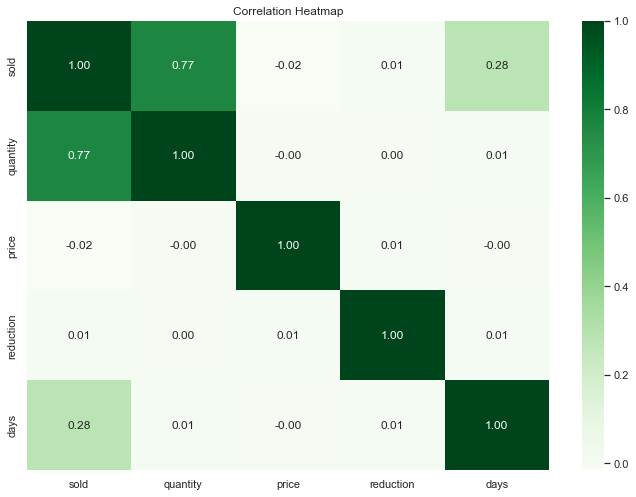

In [17]:
# mask = np.triu(np.ones_like(corr, dtype=bool))
corr = df.corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    cmap="Greens",
)
plt.title("Correlation Heatmap")

<AxesSubplot:xlabel='reduction', ylabel='Count'>

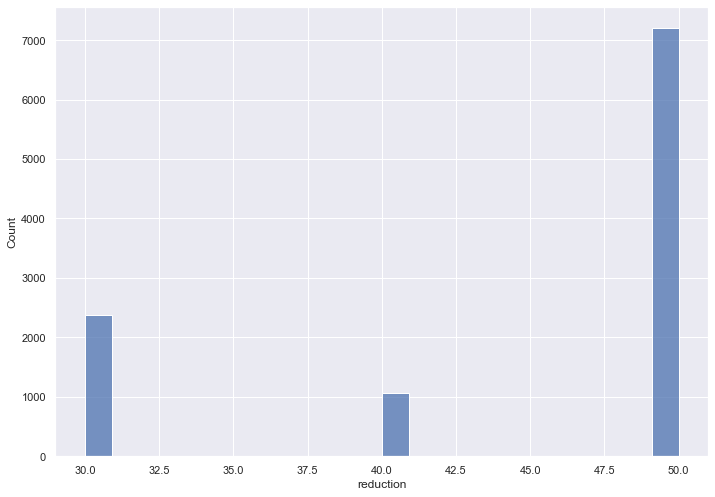

In [18]:
sns.histplot(df, x="reduction")

In [19]:
def plot_rv(df):
    df_plot = df.copy()
    bins_rv = [9, 15, 20, 30, 40, 51]
    df_plot["Reduction Value (binned)"] = pd.cut(df_plot['reduction'], bins_rv)
    
    bins_quantity = [0, 1, 2, 3, 4, 5, 10, 1000]
    df_plot["Quantity (binned)"] = pd.cut(df_plot['quantity'], bins_quantity)

    #plt.hist(df["reductionValue"], alpha=0.3,bins = 20, label="round")
    sns.countplot( x="Reduction Value (binned)", hue="Quantity (binned)", data=df_plot )
    
    plt.show()

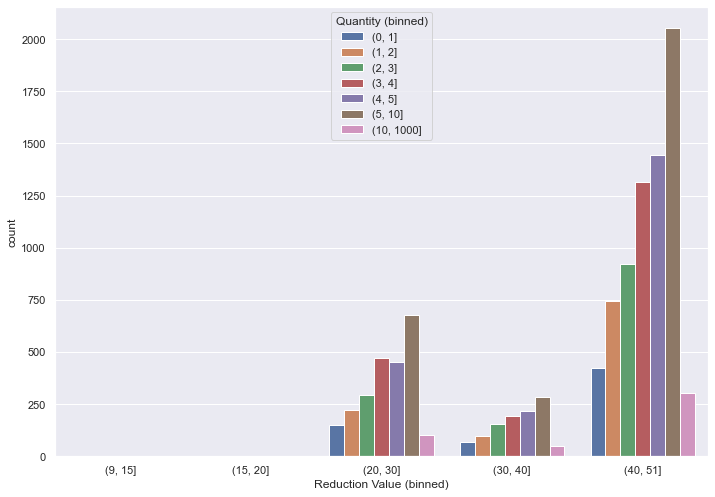

In [20]:
plot_rv(df)

<AxesSubplot:xlabel='days', ylabel='count'>

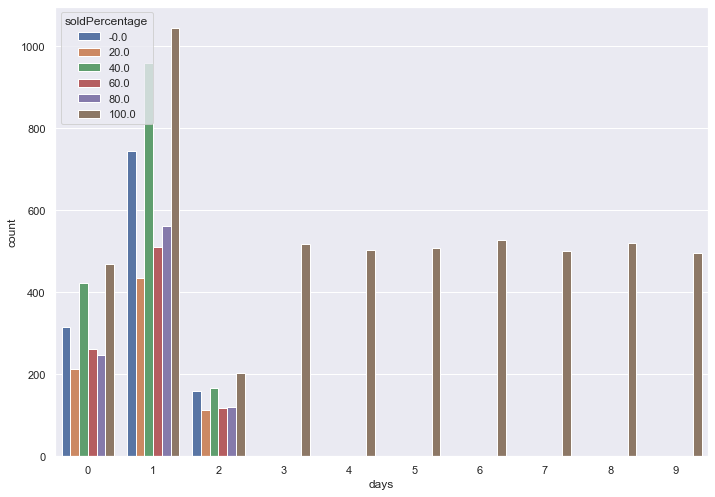

In [21]:
df_plot = df.copy()
df_plot["soldPercentage"] = round(df_plot["sold"] / df_plot["quantity"] * 100)
df_plot["soldPercentage"] = round(df_plot["soldPercentage"] / 20)*20
sns.countplot( x="days", hue="soldPercentage", data=df_plot )

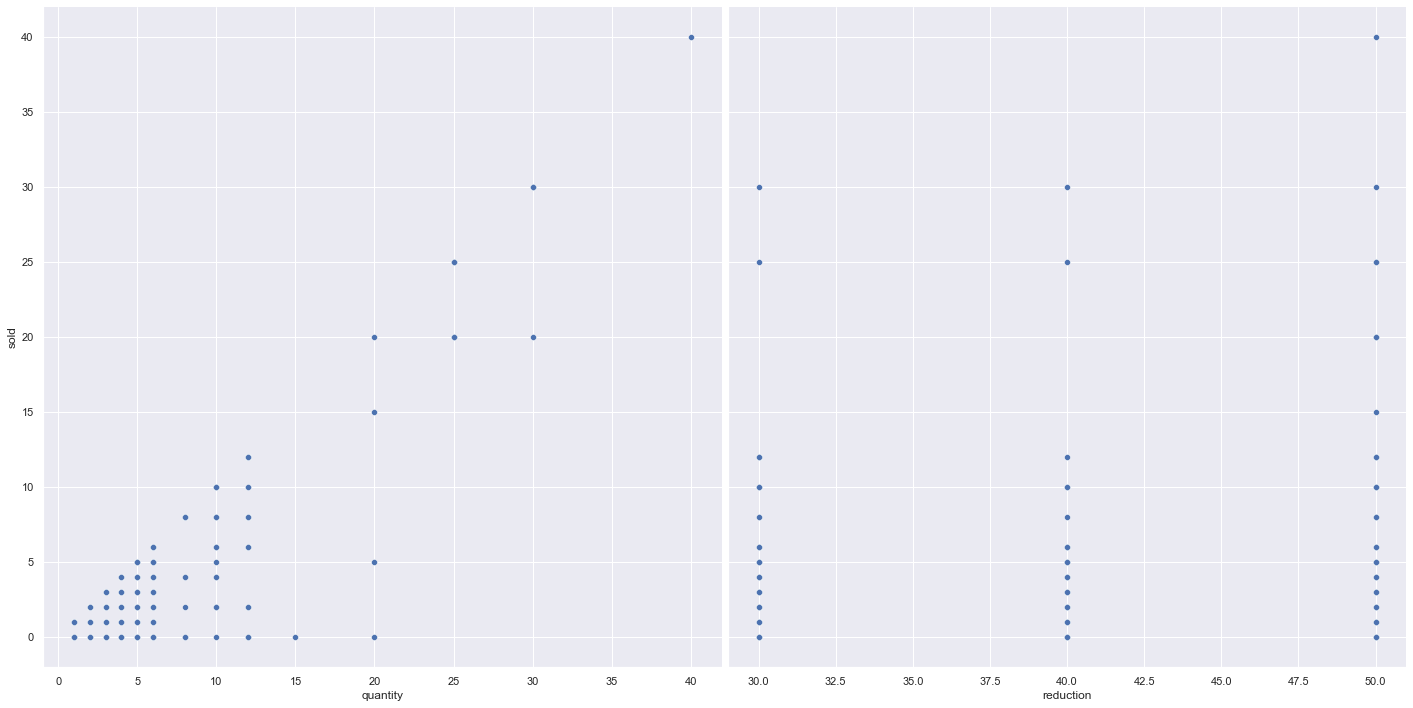

In [22]:
sns.pairplot(df.sample(1000), x_vars=["quantity", "reduction"], y_vars="sold", height=10)

<AxesSubplot:xlabel='reduction'>

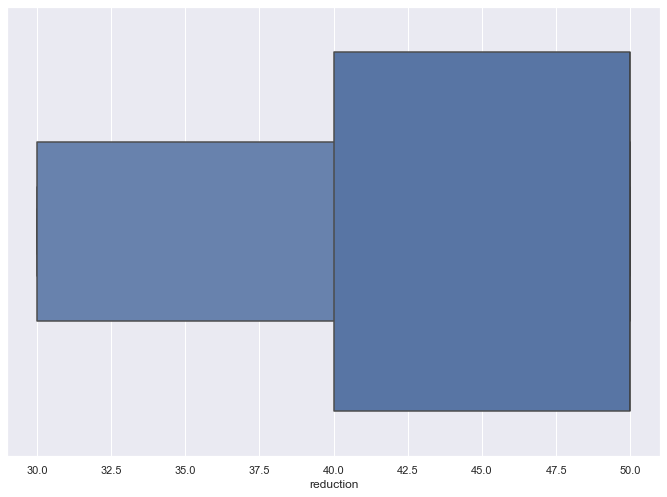

In [23]:
sns.boxenplot(x=df["reduction"])

<AxesSubplot:xlabel='sold'>

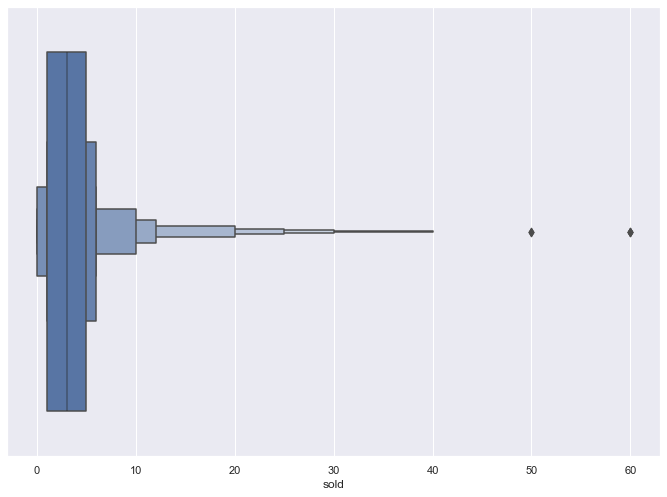

In [24]:
# note the outliers
sns.boxenplot(x=df["sold"])

<AxesSubplot:>

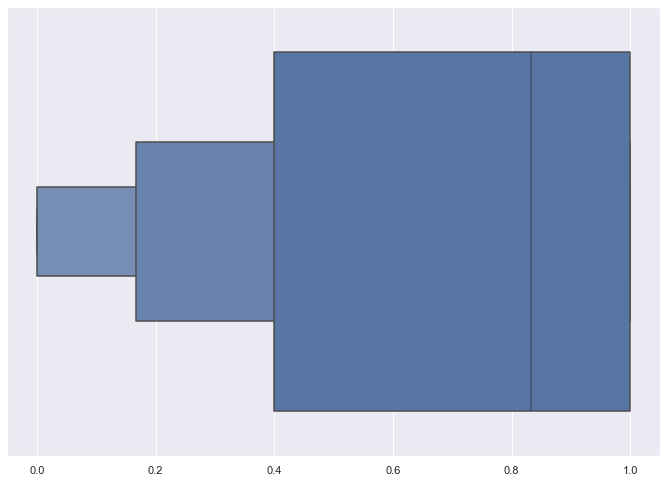

In [25]:
# sold percentage
sns.boxenplot(x=df["sold"]/df["quantity"])

### Naive Linear Regression

- use the subset of features immediatelly usable
- use all the data "as is"
- no feature engineering

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [26]:
from sklearn.linear_model import LinearRegression

**Why linear regression?**

In [27]:
# first attempt at creating a linear regression model: use all the data as is
X = df.copy()
y = X.pop("sold")

try:
    reg = LinearRegression().fit(X, y)
except Exception as e:
    print("Training failed. Reason: {0}".format(e))

Training failed. Reason: could not convert string to float: '2021-07-31'


#### What if try/except would not be used?

In [28]:
# training failed as time fields cannot be used as they are in training
# examine the data structure to identify the features we can use
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   quantity   10635 non-null  float64
 1   price      10635 non-null  float64
 2   reduction  10635 non-null  int64  
 3   date       10635 non-null  object 
 4   store      10635 non-null  object 
 5   days       10635 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 498.6+ KB


In [29]:
# select the numerical properties
features = ["quantity", "price", "reduction"]
reg = LinearRegression().fit(X[features], y)
y_pred = reg.predict(X[features])

In [30]:
# create a new dataframe including the prediction
df_out = df.copy()
df_out["prediction"] = y_pred
df_out["error"] = df_out["sold"] - df_out["prediction"]
df_out[["sold", "prediction", "error"]].sample(10)

,sold,prediction,error
10373,4.0,2.900758,1.099242
7109,2.0,1.444169,0.555831
8303,6.0,4.229016,1.770984
4856,-0.0,0.744949,-0.744949
1648,1.0,4.170374,-3.170374
8857,4.0,4.207457,-0.207457
1206,-0.0,0.736490,-0.736490
6167,6.0,4.210906,1.789094
495,4.0,2.868850,1.131150
6114,2.0,1.393987,0.606013


## Assesing the model's quality

What is a model?

### Model errors

- underfit
- overfit 

### Underfit (high bias, low variance)
<div>
   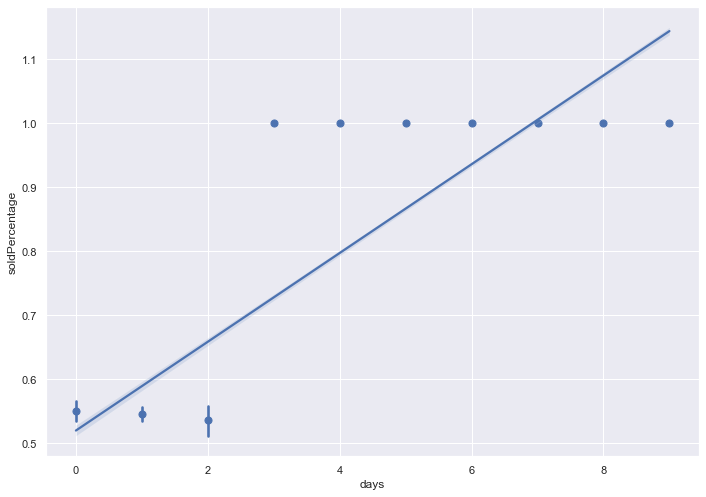
</div>


### Good Model
<div>
   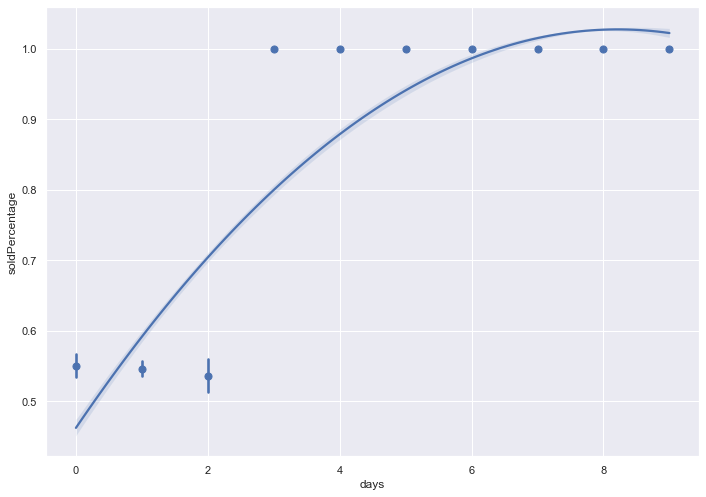
</div>



### Overfit (low bias, high variance)
<div>
   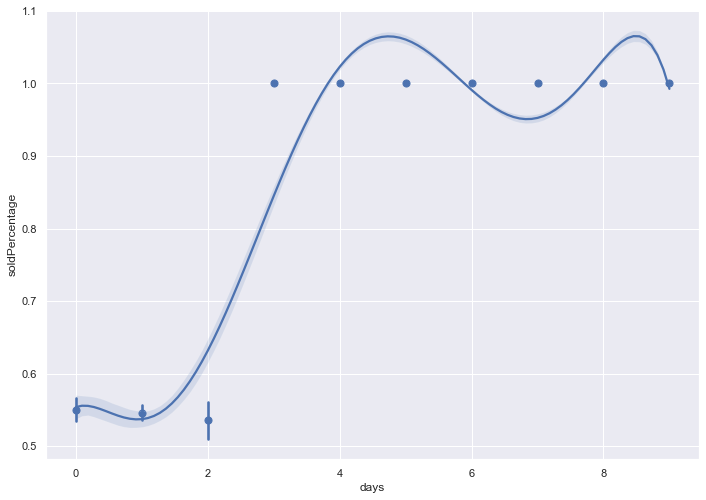
</div>

### Model Metrics

- MAE, MSE, RMSE, RMLSE
- R2 - coefficient of determination

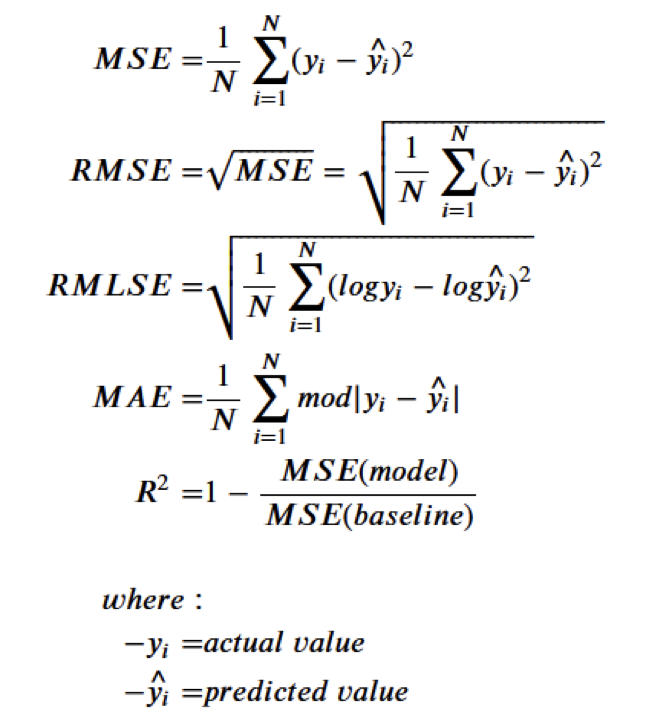

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def print_metrics(y_test, y_pred):
    display("R2: {0}".format(r2_score(y_test, y_pred)))
    display("MAE: {0}".format(mean_absolute_error(y_test, y_pred)))
    display("RMSE: {0}".format(mean_squared_error(y_test, y_pred, squared=False)))
    display("MSE: {0}".format(mean_squared_error(y_test, y_pred, squared=True)))

In [32]:
print_metrics(y, y_pred)

'R2: 0.591652349777728'

'MAE: 1.5196760614102742'

'RMSE: 2.187527965564836'

'MSE: 4.785278600128231'

In [33]:
# render the regression line and the coefficient of determination
def plot_reg(y_test, y_pred):
    plt.figure(figsize=(10, 8), dpi=80)
    
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')

    y_mean = [np.mean(y_test)]*len(y_test)

    plt.plot(y_test, y_mean, linestyle='--', color="green")
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color="red")

    plt.text(20, 10, 'R-squared = %0.2f' % r2_score(y_test, y_pred), color="red")
    
    plt.show()

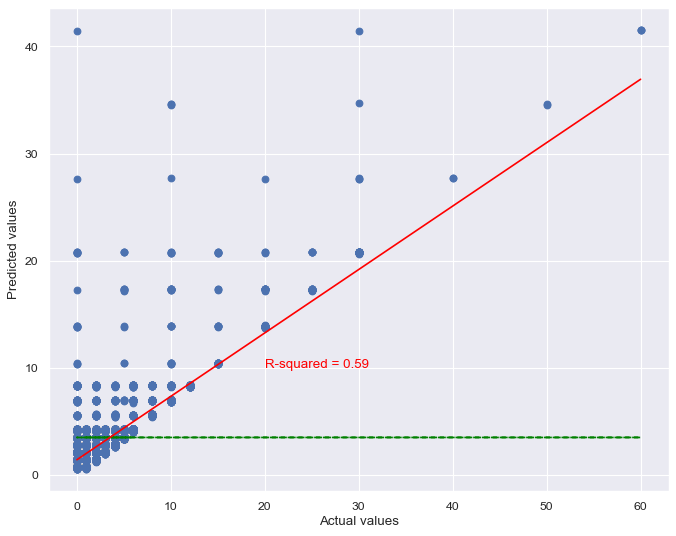

In [34]:
plot_reg(y, y_pred)

### Train/Test Split

- assesses how well the model will generalize
- results influenced by how the data is split

In [35]:
from sklearn.model_selection import train_test_split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [36]:
# training is heavily influenced by the split in the data
for i in range(0, 10):
    x_train, x_test = train_test_split(df, test_size=0.2)
    y_train = x_train.pop("sold")
    y_test = x_test.pop("sold")

    features = ["quantity", "price", "reduction"]
    reg = LinearRegression().fit(x_train[features], y_train)
    y_pred = reg.predict(x_test[features])
    
    print(round(r2_score(y_test, y_pred), 2))
    #print_metrics(y_test, y_pred)

0.55
0.6
0.48
0.64
0.64
0.66
0.61
0.59
0.53
0.69


### Visualize the model

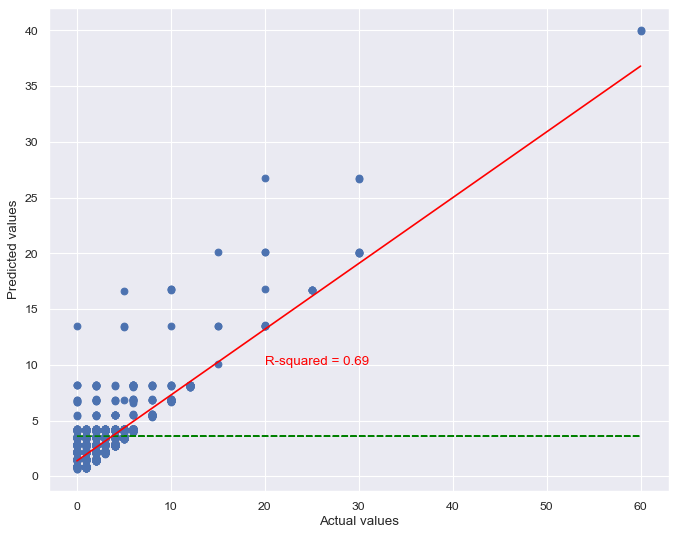

In [37]:
plot_reg(y_test, y_pred)

In [38]:
outdf = x_test.copy()
outdf["y"] = y_test
outdf["pred"] = y_pred

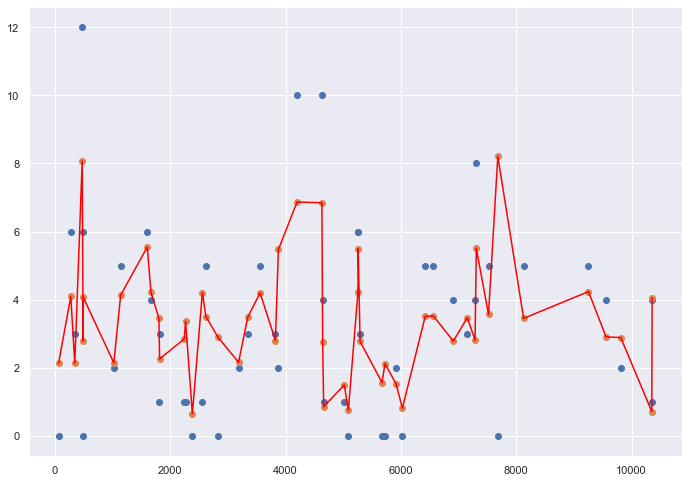

In [39]:
plotdf = outdf.reset_index().sample(50).sort_values(by="index")

#plotdf.plot(kind='scatter', x='index', y='y', color="blue")
#plotdf.plot(kind='scatter', x='index', y='pred', color="red")

plt.scatter(plotdf["index"], plotdf["y"])
plt.scatter(plotdf["index"], plotdf["pred"])

plt.plot(plotdf["index"], plotdf["pred"], color='red')

plt.show()

#### Going from an underfit model to an overfit one

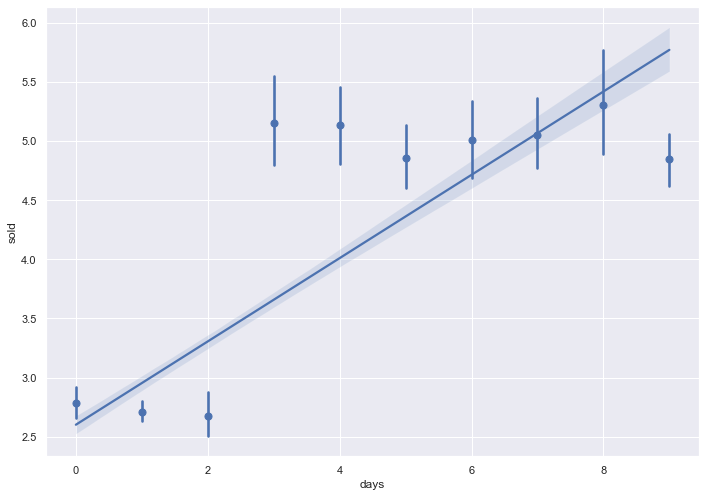

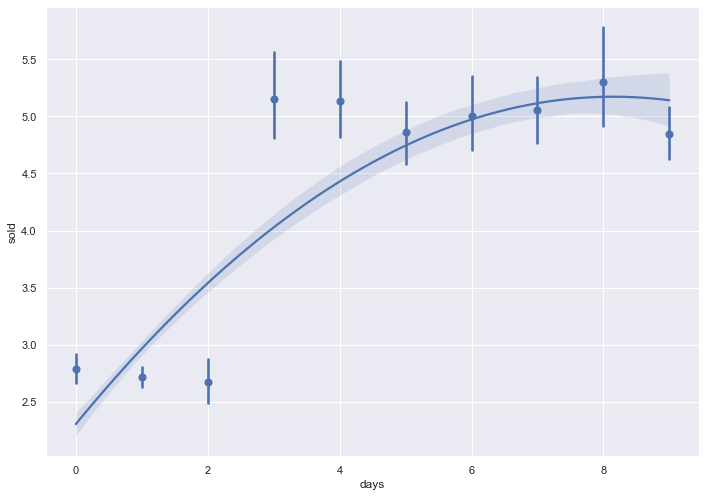

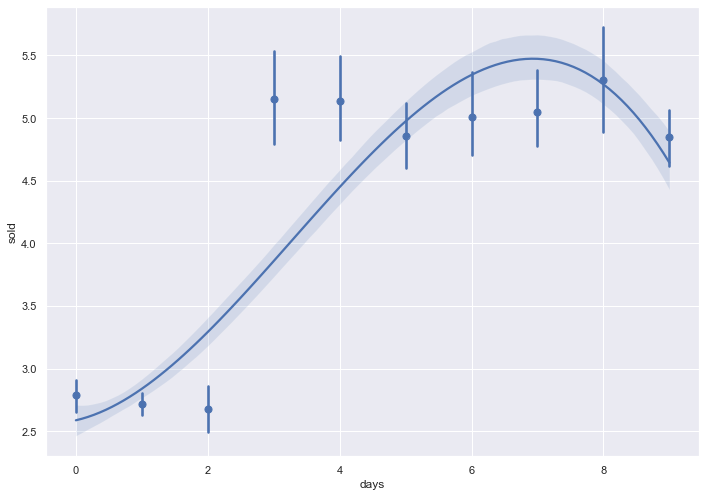

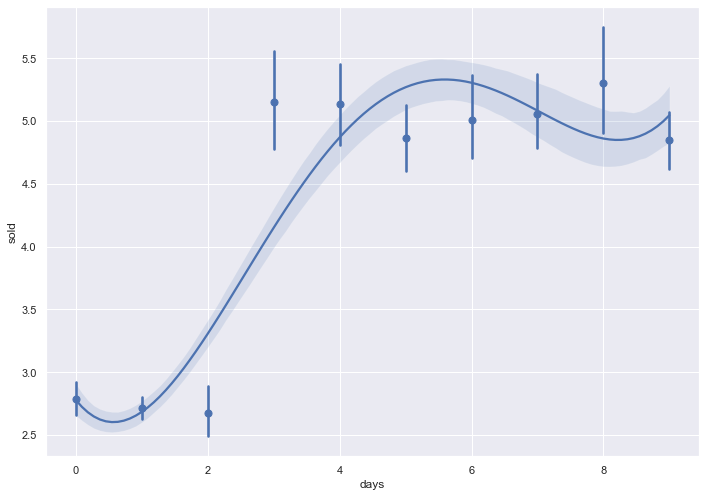

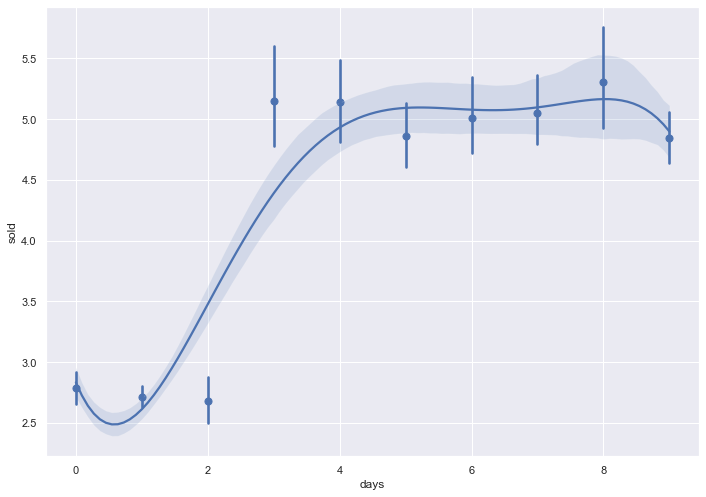

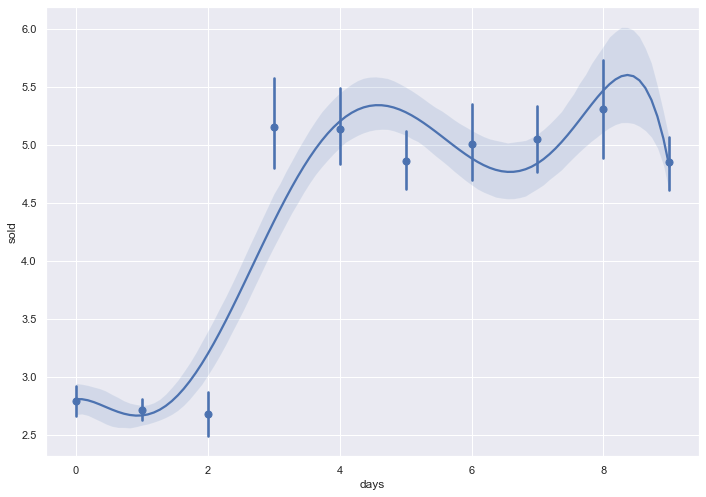

In [40]:
df_plot2 = df.copy()
df_plot2["soldPercentage"] = df_plot2["sold"] / df_plot2["quantity"]

for poly_order in range(1, 7):
    sns.regplot(x="days", y="sold", data=df_plot2, x_estimator=np.mean, order=poly_order);
    plt.show()

#### Tools that do linear regression

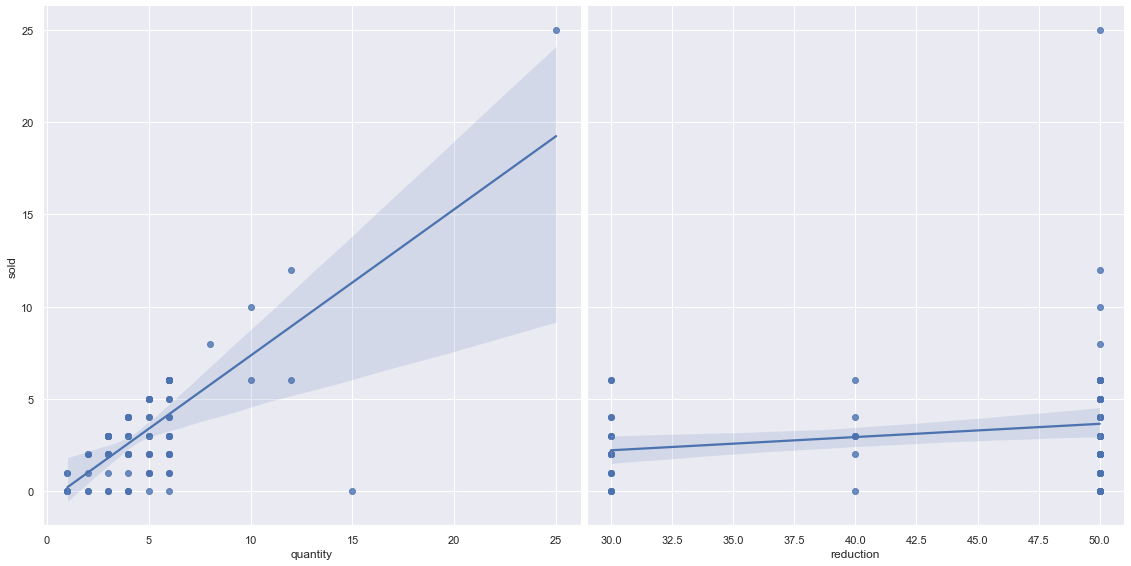

In [41]:
sns.pairplot(df_plot2.sample(100), x_vars=["quantity", "reduction"], y_vars="sold", height=8, kind="reg");

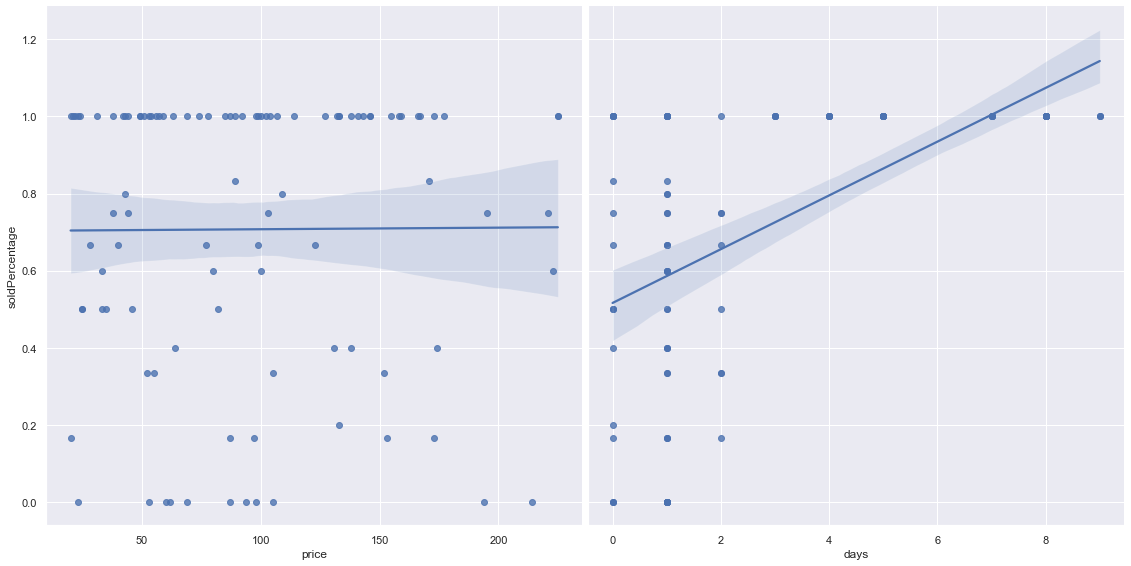

In [42]:
sns.pairplot(df_plot2.sample(100), x_vars=["price", "days"], y_vars="soldPercentage", height=8, kind="reg");

### Improving the Model with Feature Engineering

- use all features irrespective of type
- create features
- drop outliers
- select a subset of features

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

### Data Preparation

https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/

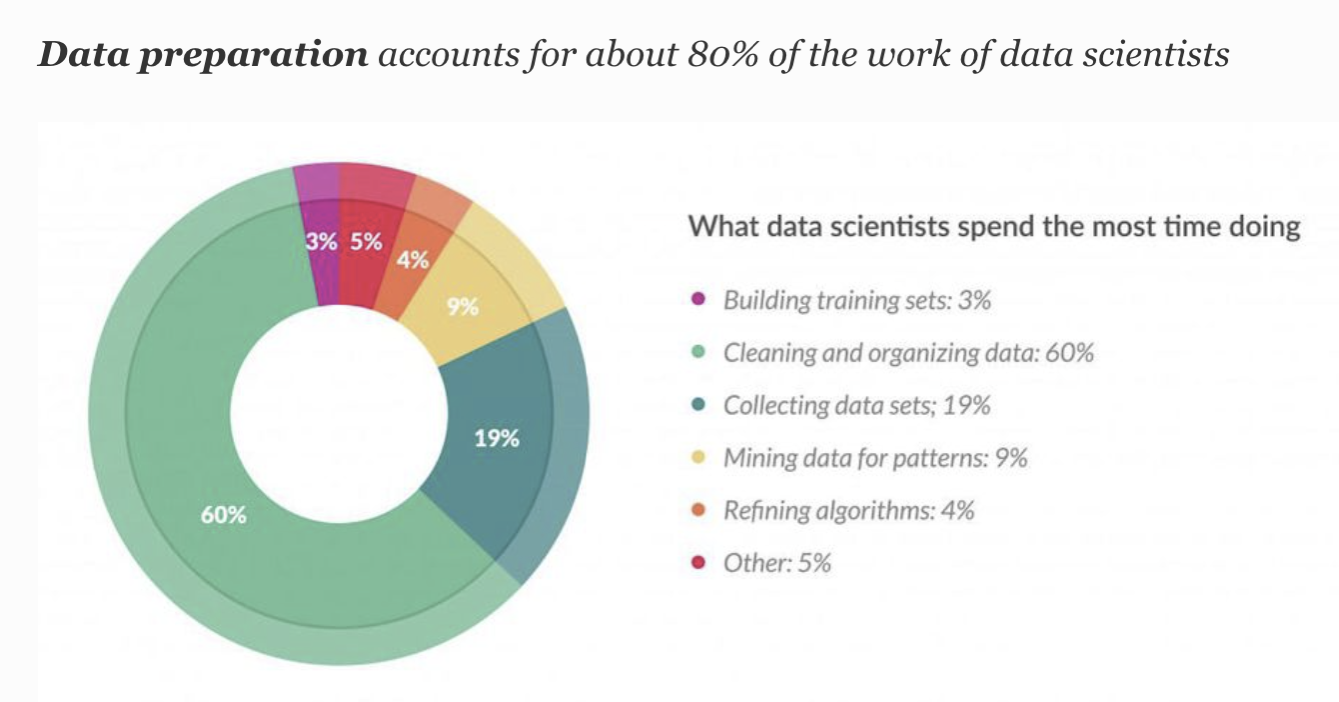

In [43]:
from sklearn.preprocessing import OrdinalEncoder

# transform ordinals into numbers
# extract date properties
# remove outliers (markdowns with more than 50 items)
# NOTE: in practice a pipeline would be used here
def prepare_features(df):
    df_2 = df.copy()
    df_2[["date"]] = df_2[["date"]].apply(pd.to_datetime)
    df_2["month"] = df_2["date"].dt.month
    df_2["year"] = df_2["date"].dt.year
    df_2 = df_2.drop("date", axis=1)
    
    enc = OrdinalEncoder()
    df_2[["store"]] = enc.fit_transform(df_2[["store"]])
    
    print("Outliers {0}".format(df_2[df_2["quantity"] >= 50].shape[0]))
    print("Record count {0}".format(df_2.shape[0]))

    df_2 = df_2[df_2["quantity"] < 50]

    return df_2

### Other techniques for feature engineering

- https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca
- https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

In [44]:
# prepare the data and examine it
df_2 = prepare_features(df)
df_2.sample(10)

Outliers 11
Record count 10635


,sold,quantity,price,reduction,store,days,month,year
633,4.0,4.0,129.0,50,2.0,6,2,2022
4977,2.0,3.0,58.0,50,2.0,1,8,2021
3016,3.0,5.0,177.0,50,3.0,0,3,2022
896,3.0,3.0,184.0,50,3.0,6,1,2021
5233,2.0,5.0,105.0,40,0.0,0,9,2021
4889,4.0,4.0,46.0,50,3.0,2,2,2021
4359,4.0,4.0,81.0,50,3.0,7,2,2021
6436,15.0,25.0,61.0,40,2.0,1,3,2021
867,3.0,4.0,124.0,30,1.0,2,5,2021
8042,0.0,2.0,212.0,30,3.0,0,12,2021


Text(0.5, 1.0, 'Correlation Heatmap')

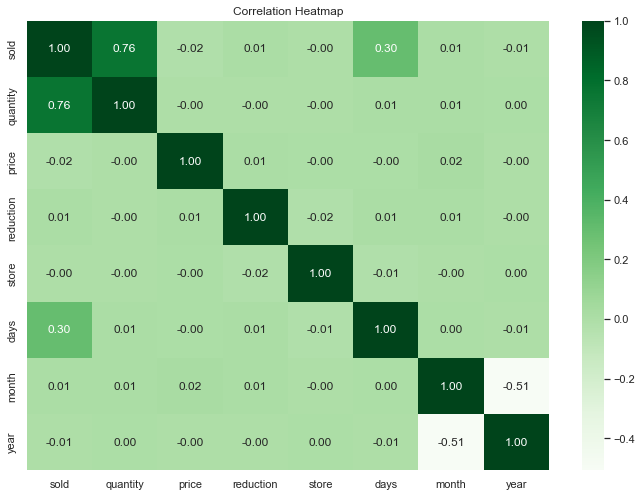

In [45]:
# examine how the new features are correlated to the target variable
corr = df_2.corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    cmap="Greens",
)
plt.title("Correlation Heatmap")

In [46]:
# train again using all the features
# notice the smaller amplitude of the R2 variation
for i in range(0, 20):
    x_train, x_test = train_test_split(df_2, test_size=0.2)
    y_train = x_train.pop("sold")
    y_test = x_test.pop("sold")

    reg = LinearRegression().fit(x_train, y_train)
    y_pred = reg.predict(x_test)

    print(round(r2_score(y_test, y_pred), 2))
    #print_metrics(y_test, y_pred)

0.68
0.69
0.65
0.65
0.64
0.62
0.68
0.7
0.6
0.63
0.7
0.57
0.7
0.69
0.61
0.7
0.68
0.68
0.6
0.66


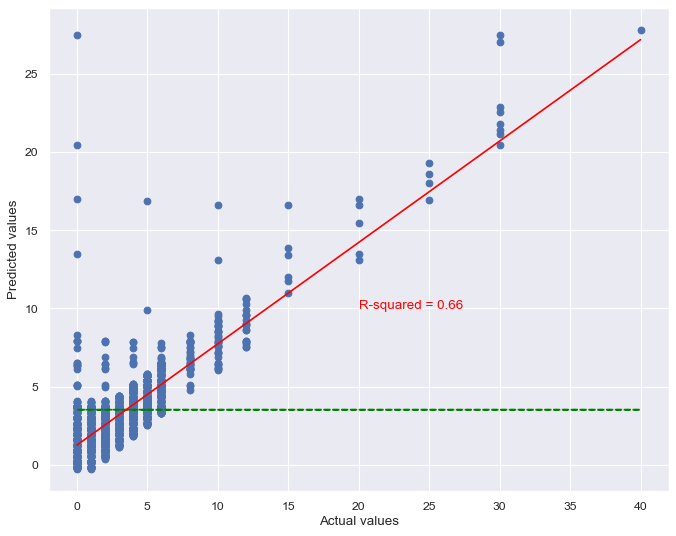

In [47]:
plot_reg(y_test, y_pred)

#### What other features have we tried using?

### Tree Models

- typically used for classification problems
- prone to overfitting

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [48]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42)
%time dtree = dtree.fit(x_train, y_train)

display("R2 score on training data: {0}".format(dtree.score(x_train, y_train)))

CPU times: user 70.3 ms, sys: 29.9 ms, total: 100 ms
Wall time: 16.3 ms


'R2 score on training data: 0.9987732450771994'

In [49]:
y_pred = dtree.predict(x_test)
print_metrics(y_test, y_pred)

'R2: 0.48348071453963737'

'MAE: 1.2324705882352942'

'RMSE: 2.3525205506385'

'MSE: 5.53435294117647'

In [50]:
dtree_2 = DecisionTreeRegressor(random_state=42, max_leaf_nodes=10)
%time dtree_2 = dtree_2.fit(x_train, y_train)

display("R2 score on training data: {0}".format(dtree_2.score(x_train, y_train)))

y_pred = dtree_2.predict(x_test)
print_metrics(y_test, y_pred)

CPU times: user 26.4 ms, sys: 12.4 ms, total: 38.8 ms
Wall time: 6.55 ms


'R2 score on training data: 0.7134673024446996'

'R2: 0.6873028001494412'

'MAE: 1.1688376286163251'

'RMSE: 1.8304258956409483'

'MSE: 3.350458959432968'

### Visualizing Decission Trees

- https://graphviz.org/ is recommended for visualizing the trees

In [51]:
from sklearn import tree
print(tree.export_text(dtree_2))

|--- feature_0 <= 9.00
|   |--- feature_0 <= 4.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- value: [1.12]
|   |   |--- feature_0 >  2.50
|   |   |   |--- feature_4 <= 2.50
|   |   |   |   |--- value: [1.94]
|   |   |   |--- feature_4 >  2.50
|   |   |   |   |--- value: [3.58]
|   |--- feature_0 >  4.50
|   |   |--- feature_4 <= 2.50
|   |   |   |--- value: [3.16]
|   |   |--- feature_4 >  2.50
|   |   |   |--- value: [5.63]
|--- feature_0 >  9.00
|   |--- feature_0 <= 17.50
|   |   |--- feature_4 <= 2.50
|   |   |   |--- value: [6.20]
|   |   |--- feature_4 >  2.50
|   |   |   |--- value: [11.10]
|   |--- feature_0 >  17.50
|   |   |--- feature_4 <= 2.50
|   |   |   |--- value: [14.17]
|   |   |--- feature_4 >  2.50
|   |   |   |--- feature_0 <= 27.50
|   |   |   |   |--- value: [22.04]
|   |   |   |--- feature_0 >  27.50
|   |   |   |   |--- value: [30.59]



[Text(0.47058823529411764, 0.9, 'X[0] <= 9.0\nsquared_error = 10.167\nsamples = 8499\nvalue = 3.469'),
 Text(0.23529411764705882, 0.7, 'X[0] <= 4.5\nsquared_error = 3.809\nsamples = 7925\nvalue = 2.975'),
 Text(0.11764705882352941, 0.5, 'X[0] <= 2.5\nsquared_error = 1.825\nsamples = 4082\nvalue = 2.014'),
 Text(0.058823529411764705, 0.3, 'squared_error = 0.582\nsamples = 1381\nvalue = 1.12'),
 Text(0.17647058823529413, 0.3, 'X[4] <= 2.5\nsquared_error = 1.843\nsamples = 2701\nvalue = 2.471'),
 Text(0.11764705882352941, 0.1, 'squared_error = 1.737\nsamples = 1832\nvalue = 1.943'),
 Text(0.23529411764705882, 0.1, 'squared_error = 0.243\nsamples = 869\nvalue = 3.583'),
 Text(0.35294117647058826, 0.5, 'X[4] <= 2.5\nsquared_error = 3.892\nsamples = 3843\nvalue = 3.997'),
 Text(0.29411764705882354, 0.3, 'squared_error = 3.583\nsamples = 2536\nvalue = 3.157'),
 Text(0.4117647058823529, 0.3, 'squared_error = 0.468\nsamples = 1307\nvalue = 5.626'),
 Text(0.7058823529411765, 0.7, 'X[0] <= 17.5\n

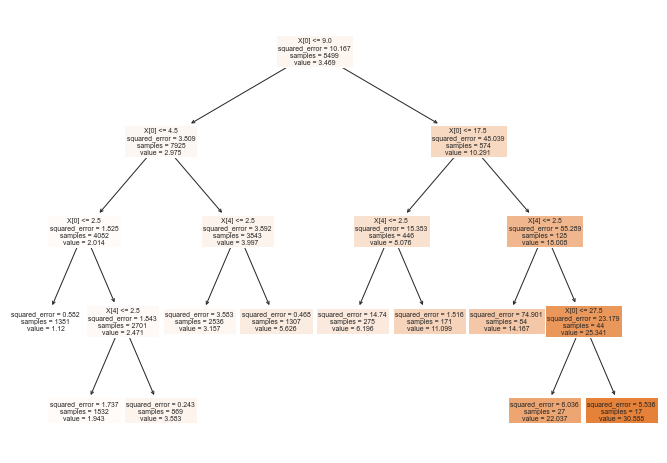

In [52]:
#fig = plt.figure(figsize=(50,50))
tree.plot_tree(dtree_2, max_depth=5, filled=True)

In [53]:
# how to install missing dependencies?
# !pip install graphviz

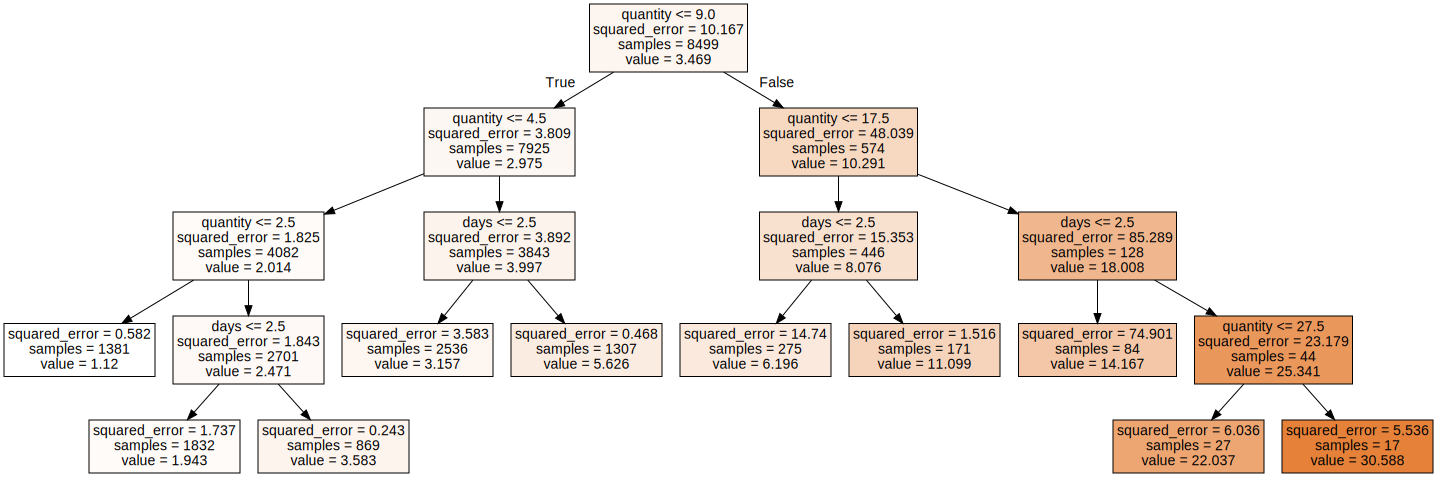

In [54]:
try:
    import graphviz
    # DOT data
    with open("dtree2.dot", 'w') as dotfile:
        tree.export_graphviz(dtree_2, max_depth=5, feature_names=x_train.columns.values, out_file=dotfile, filled=True)
        
    dot_data = tree.export_graphviz(dtree_2, max_depth=5, feature_names=x_train.columns.values, out_file=None, filled=True)
    graph = graphviz.Source(dot_data, format="svg") 
    display(graph)
except Exception as e:
    print("Failed rendering to graphviz. Verify that graphviz is installed. Error is: {0}".format(e))



### Ensembles

https://scikit-learn.org/stable/modules/ensemble.html

- build a better model by combining multiple weaker models
- for trees: train multiple trees, each on a subset of the data so no tree learns the data "too well" (counters overfitting)

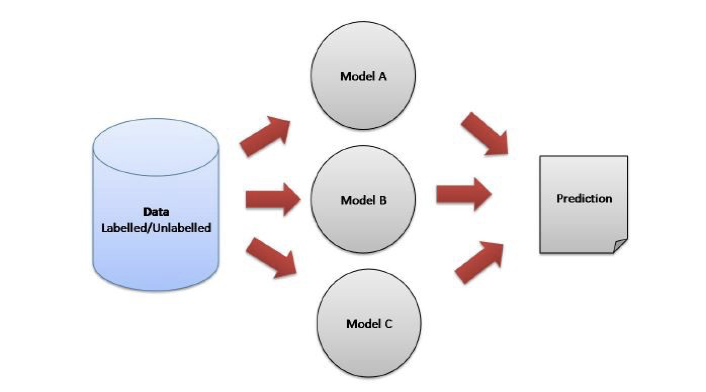

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
%time rf = rf.fit(x_train, y_train)
print("R2 on training data: {0}".format(rf.score(x_train, y_train)))

CPU times: user 1.19 s, sys: 65 ms, total: 1.26 s
Wall time: 196 ms
R2 on training data: 0.9561484276503907


In [56]:
y_pred = rf.predict(x_test)
print_metrics(y_test, y_pred)

'R2: 0.675927002052032'

'MAE: 1.0264728963585434'

'RMSE: 1.8634235444387803'

'MSE: 3.4723473059687873'

### Hyper Parameter Optimization

- ML engineering side
- high cost in time and CPU/GPU 
- comes later in the flow and with an overall less impact than other methods (feature engineering, data collection etc)
- may improve the model by a few %

In [57]:
from xgboost import XGBRegressor

# train using the default parameters
xgb = XGBRegressor()

%time rf = xgb.fit(x_train, y_train)
print("R2 on training data: {0}".format(xgb.score(x_train, y_train)))

y_pred = xgb.predict(x_test)
print_metrics(y_test, y_pred)

/Users/dragoscojocari/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/dragoscojocari/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: user 2.64 s, sys: 546 ms, total: 3.19 s
Wall time: 551 ms
R2 on training data: 0.9034360208335188


/Users/dragoscojocari/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


'R2: 0.6456740890036107'

'MAE: 1.0996515566474374'

'RMSE: 1.9484605239110087'

'MSE: 3.7964984132395627'

In [58]:
# train using less optimal parameters
xgb = XGBRegressor(base_score=0.5, booster='gbtree', 
       importance_type='gain', 
       learning_rate=0.01, 
       max_delta_step=0,
       n_estimators=100,
       max_depth=15, 
       min_child_weight=1, 
       n_jobs=1,
       random_state=0,
       verbosity=1)

%time rf = xgb.fit(x_train, y_train)
print("R2 on training data: {0}".format(xgb.score(x_train, y_train)))

y_pred = xgb.predict(x_test)
print_metrics(y_test, y_pred)

/Users/dragoscojocari/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: user 2.09 s, sys: 254 ms, total: 2.34 s
Wall time: 1.74 s
R2 on training data: 0.6150511233417388


/Users/dragoscojocari/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


'R2: 0.42729684607788665'

'MAE: 1.6816936838767107'

'RMSE: 2.4771650419057822'

'MSE: 6.136346644840075'

## Using the Model

- the goal of ML: drive business value from data, help take better decissions
- predict on new data (inference)
- use the raw predictions?

In [59]:
def gen_dataset_rv(base_df):
    MIN_RV = 10
    MAX_RV = 50
    ROW_NR_COL = "_row_nr"

    test_features_rv = base_df.copy()
    
    test_features_rv = pd.concat([test_features_rv] * (MAX_RV - MIN_RV)).sort_index()
    test_features_rv[ROW_NR_COL] = np.arange(len(test_features_rv))
    test_features_rv["reduction"] = (
        (test_features_rv[ROW_NR_COL] % (MAX_RV - MIN_RV)) + MIN_RV + 1
    )
    test_features_rv.pop(ROW_NR_COL)
        
    return test_features_rv

def postprocess_rv(result_df, predictions, round_values):
    processed_result_df = result_df.copy()

    processed_result_df["predicted"] = predictions
    processed_result_df["predicted"] = np.maximum(0, processed_result_df["predicted"])
    processed_result_df["predicted"] = processed_result_df[["predicted", "quantity"]].min( axis=1)
    if round_values:
        processed_result_df["predicted"] = round(processed_result_df["predicted"], 1)

    df_max = processed_result_df[
        processed_result_df.groupby(processed_result_df.index)["predicted"].transform("max")
        == processed_result_df["predicted"]
    ]
    df_max = df_max.groupby(df_max.index).first()
    
    return df_max

In [60]:
# build the model on training data than predict on the test data
df_use = prepare_features(df)
x_train_use, x_test_use = train_test_split(df_use, test_size=0.2, random_state=42)
y_train_use = x_train_use.pop("sold")
y_test_use = x_test_use.pop("sold")
    
df_simulation = gen_dataset_rv(x_test_use)
reg_use = LinearRegression().fit(x_train_use, y_train_use)
y_pred = reg_use.predict(df_simulation)

Outliers 11
Record count 10635


<AxesSubplot:xlabel='reduction', ylabel='Count'>

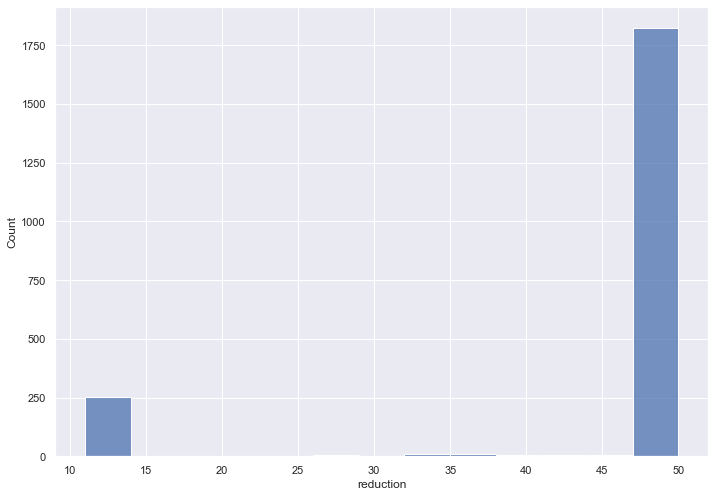

In [61]:
# plot the best model prediction, observe the results (the model learned what it could from the data)
df_simulation_out = postprocess_rv(df_simulation, y_pred, False)
sns.histplot(df_simulation_out, x="reduction")

<AxesSubplot:xlabel='reduction', ylabel='Count'>

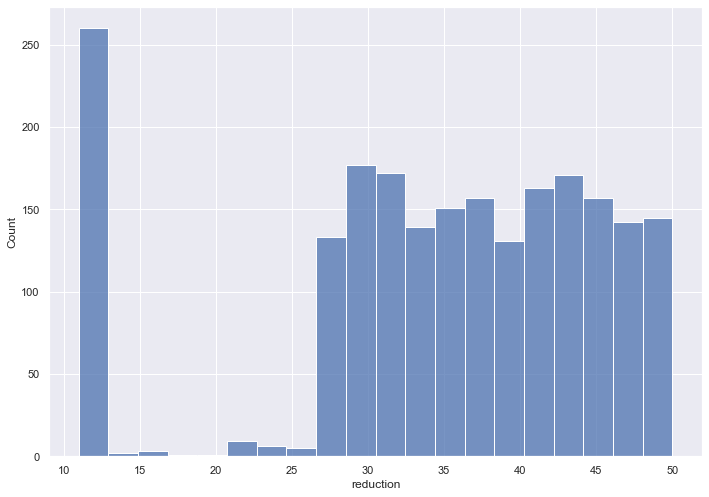

In [62]:
# spread the prediction over a wider range by rounding the predicted values and 
# picking the smallest reduction value that maximizes the sold quantity
df_simulation_out = postprocess_rv(df_simulation, y_pred, True)
sns.histplot(df_simulation_out, x="reduction")

### Further Considerations

- time matters - do not train on data from this year and predict/test on data from 2 years ago
- not a time series - we do not predict the value for the next time interval 

In [63]:
df_sorted = df.copy().sort_values("date")
df_sorted = prepare_features(df_sorted)
x_train_sorted, x_test_sorted = train_test_split(df_sorted, test_size=0.2, shuffle=False)
y_train_sorted = x_train_sorted.pop("sold")
y_test_sorted = x_test_sorted.pop("sold")

Outliers 11
Record count 10635


In [64]:
reg_sorted = LinearRegression().fit(x_train_sorted, y_train_sorted)
y_pred_sorted = reg_sorted.predict(x_test_sorted)
print_metrics(y_test_sorted, y_pred_sorted)

'R2: 0.6700689006304763'

'MAE: 1.2707418636179217'

'RMSE: 1.8723006636210284'

'MSE: 3.505509774995743'

In [65]:
df_sorted = df.sort_values("date")
df_sorted.head(5)

,sold,quantity,price,reduction,date,store,days
5358,3.0,5.0,147.0,50,2021-01-01,MAG_2,0
9306,4.0,4.0,117.0,50,2021-01-01,MAG_3,3
1144,5.0,5.0,21.0,50,2021-01-01,MAG_4,5
3668,8.0,8.0,102.0,30,2021-01-01,MAG_3,3
368,2.0,4.0,101.0,50,2021-01-01,MAG_3,1


### Train on  a smaller, more recent window of data

- data skew - customer behavior changed in the past 2 years
- exceptional events - first Covid lockdown in 2020

In [66]:
df_sorted = df[df["date"] > "2021-09-01"]
display(df_sorted.head())

df_sorted = df_sorted.sort_values("date")
print(df_sorted.shape)
df_sorted = prepare_features(df_sorted)
x_train_new, x_test_new = train_test_split(df_sorted, test_size=0.2, shuffle=False)
y_train_new = x_train_new.pop("sold")
y_test_new = x_test_new.pop("sold")

,sold,quantity,price,reduction,date,store,days
2,5.0,5.0,38.0,30,2022-01-05,MAG_4,9
3,5.0,5.0,102.0,40,2022-03-01,MAG_4,4
9,8.0,8.0,22.0,50,2022-02-07,MAG_3,0
11,6.0,6.0,99.0,30,2022-01-02,MAG_2,4
15,5.0,5.0,216.0,50,2021-12-22,MAG_4,6


(4985, 7)
Outliers 8
Record count 4985


In [67]:
reg_new = LinearRegression().fit(x_train_new, y_train_new)
y_pred_new = reg_new.predict(x_test_new)
print_metrics(y_test_new, y_pred_new)

'R2: 0.7316454347498992'

'MAE: 1.220699058782523'

'RMSE: 1.7297492229851161'

'MSE: 2.992032374417613'

## StatsModels

In [68]:
# uncomment the next line to install the statsmodels package
# !pip install statsmodels

In [71]:
import statsmodels.formula.api as smf


def train_statsmodel(
    formula,
    df_train,
    df_test,
    y_test,
    alpha=None,
    max_iter=10_000,
):
    md = smf.ols(formula=formula, data=df_train)

    if alpha is None:
        mdf = md.fit()
        display(mdf.summary())
    else:
        mdf = md.fit_regularized(
            method="elastic_net", alpha=alpha, L1_wt=1.0, maxiter=max_iter
        )
        display(mdf.params)

    y_pred = mdf.predict(df_test)
    return print_metrics(y_test, y_pred)


df_sm = df.copy().sort_values("date")
df_sm[["date"]] = df_sm[["date"]].apply(pd.to_datetime)
df_train_sm, x_test_sm = train_test_split(df_sm, test_size=0.2, shuffle=False)
y_test_sm = x_test_sm.pop("sold")

sm_ols_metric = train_statsmodel(
    f"""
        sold 
        
        ~ 

        + date.dt.year
        
        + date.dt.month
        
        + date.dt.day
        
        + days 
        
        + price
        
        + reduction

        + quantity
        
    """,
    df_train_sm,
    x_test_sm,
    y_test_sm
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   sold   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     2760.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:03:43   Log-Likelihood:                -17638.
No. Observations:                8508   AIC:                         3.529e+04
Df Residuals:                    8501   BIC:                         3.534e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.931e-07    3.3e-08     -5.855      0.000   -2.58e-07   -1.28e-07
date.dt.year     -0.0004   6.67e-05     -5.855      0.000      -0.001      -0.000
date.dt.month    -0.0030      0.006     -0.489      0.625      -0.015       0.009
date.dt.day       0.0006      0.002      0.256      0.798      -0.004       0.005
days              0.3392      0.008     44.661      0.000       0.324       0.354
price            -0.0007      0.000     -1.980      0.048      -0.001   -7.38e-06
reduction         0.0022      0.003      0.868      0.386      -0.003       0.007
quantity          0.6845      0.006    120.482      0.000       0.673       0.696
==============================================================================
Omnibus:                     4994.998   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           269301.092
Skew:                          -2.097   Prob(JB):                         0.00
Kurtosis:                      30.241   Cond. No.                     2.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.62e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

'R2: 0.6877684122534552'

'MAE: 1.3191206118085534'

'RMSE: 2.1609176130810575'

'MSE: 4.6695649305239355'

# Summary

- load data using Pandas
- vizualize the data and it's properties
- select the data to use 
- create the features for the model
- split the data in training and test subsets
- train the model
- asses the model performance on the test dataset
- try other algorithms
- fine tune the algorithm using Hyper Parameter Optimization
- use the model to make predictions
- use the raw predictions or post process them as per business needs